<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [1]:
%load_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from src import soporte_logistica as sl

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_pickle("datos/financial_data_target.pkl")
df.head()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,...,location_City-46,location_City-47,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9
0,1,1082,2027,5758.59,0,0.524610,43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1015,2053,1901.56,1,0.486978,61,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1004,2035,1248.86,1,0.524610,57,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1095,2037,7619.05,1,0.505313,59,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,1036,2083,1890.10,1,0.513546,36,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x = df.drop(columns="is_fraudulent")
y = df["is_fraudulent"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, shuffle=True)
modelo_logistica = LogisticRegression()
modelo_logistica.fit(x_train, y_train)

y_pred_test = modelo_logistica.predict(x_test)
y_pred_train = modelo_logistica.predict(x_train)

df_pred = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred_test)], axis=1)
df_pred.columns = ["Real", "Predicho"]
df_pred

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Real,Predicho
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
1995,0,0
1996,0,1
1997,0,0
1998,1,0


In [4]:
sl.calcular_metricas(y_train, y_test, y_pred_train, y_pred_test)

,train,test
accuracy,0.520125,0.515000
precision,0.520151,0.515684
recall,0.520125,0.515000
f1,0.520133,0.515136


Text(45.722222222222214, 0.5, 'Real')

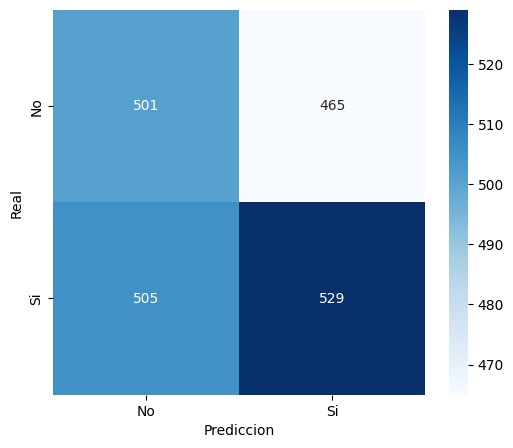

In [5]:
matriz_confusion = confusion_matrix(y_test, y_pred_test)
etiquetas = ["No", "Si"]
plt.figure(figsize=(6,5))
sns.heatmap(matriz_confusion, annot=True, fmt="d",
            xticklabels=etiquetas,
            yticklabels=etiquetas,
            cmap="Blues")

plt.xlabel("Prediccion")
plt.ylabel("Real")


In [6]:
# df = df[[col for col in df.columns.to_list() if "outlier" not in col]]

In [7]:
df

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,...,location_City-46,location_City-47,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9
0,1,1082,2027,5758.59,0,0.524610,43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1015,2053,1901.56,1,0.486978,61,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1004,2035,1248.86,1,0.524610,57,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1095,2037,7619.05,1,0.505313,59,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,1036,2083,1890.10,1,0.513546,36,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,1,0.479829,36,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9997,1053,2026,30.15,0,0.513546,42,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9998,1041,2034,6333.64,0,0.486978,36,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,9999,1009,2019,2837.13,1,0.513546,57,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.drop(columns=["transaction_id", "customer_id", "merchant_id", "amount"], inplace=True)
# "card_type", "location", "customer_age", "transaction_time"

In [10]:
soporte = sl.AnalisisModelosClasificacion(df, "is_fraudulent")
soporte.ajustar_modelo("logistic_regression")
soporte.calcular_metricas("logistic_regression")

,train,test
accuracy,0.504250,0.517000
precision,0.254268,0.267289
recall,0.504250,0.517000
f1,0.338066,0.352392
kappa,0.000000,0.000000
auc,0.500000,0.500000


In [ ]:
df.isnull().sum()

is_fraudulent                        0
card_type                            0
location                             0
customer_age                         0
purchase_category_Gas Station        0
purchase_category_Groceries          0
purchase_category_Online Shopping    0
purchase_category_Restaurant         0
purchase_category_Retail             0
purchase_category_Travel             0
dtype: int64

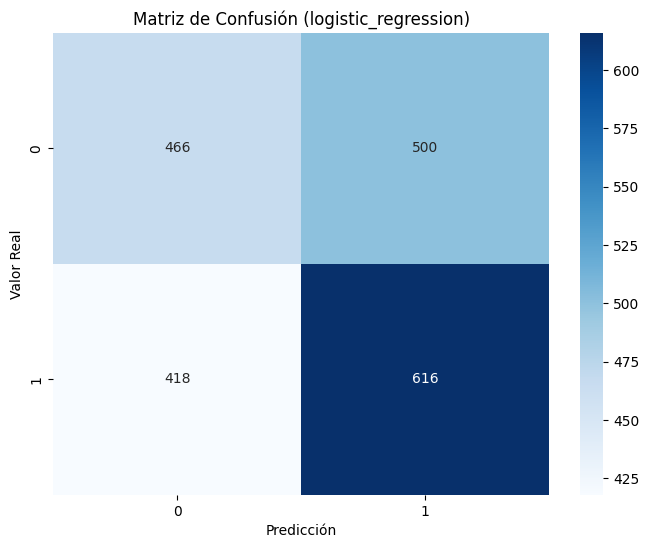

In [ ]:
soporte.plot_matriz_confusion("logistic_regression")

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\src\soporte_logistica.py:264: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


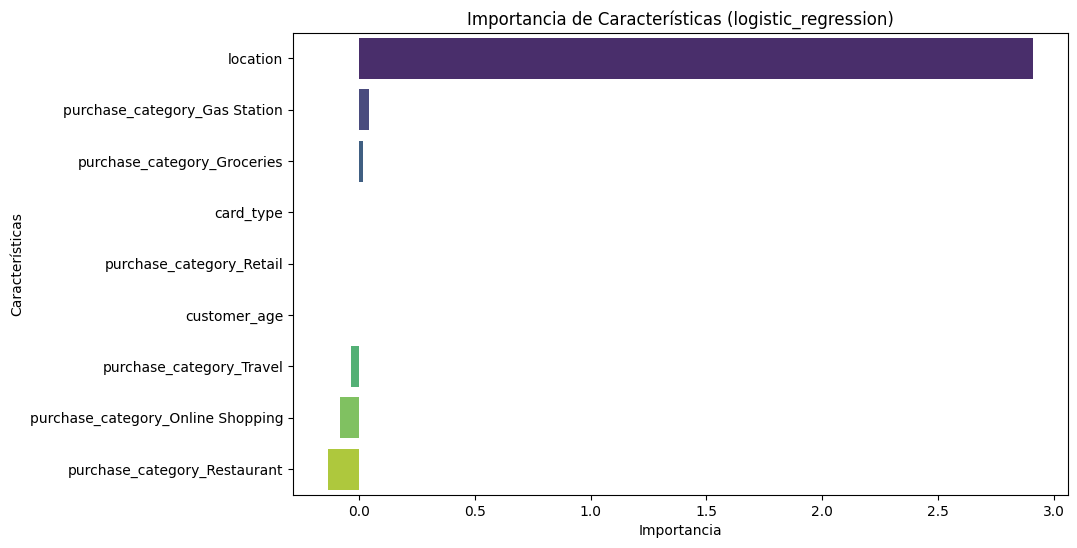

In [ ]:
soporte.importancia_predictores("logistic_regression")

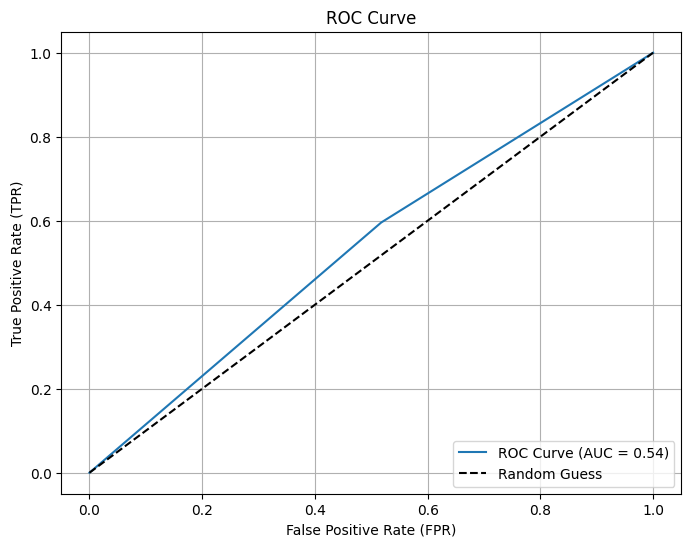

In [ ]:
soporte.hacer_roc_curve("logistic_regression")

In [ ]:
df.drop(columns=["purchase_category_Restaurant"], inplace=True)
soporte = sl.AnalisisModelosClasificacion(df, "is_fraudulent")
soporte.ajustar_modelo("logistic_regression")
soporte.calcular_metricas("logistic_regression")

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

,train,test
accuracy,0.537125,0.543000
precision,0.537096,0.541967
recall,0.537125,0.543000
f1,0.535810,0.541478
kappa,0.073409,0.082256
auc,0.544141,0.563170


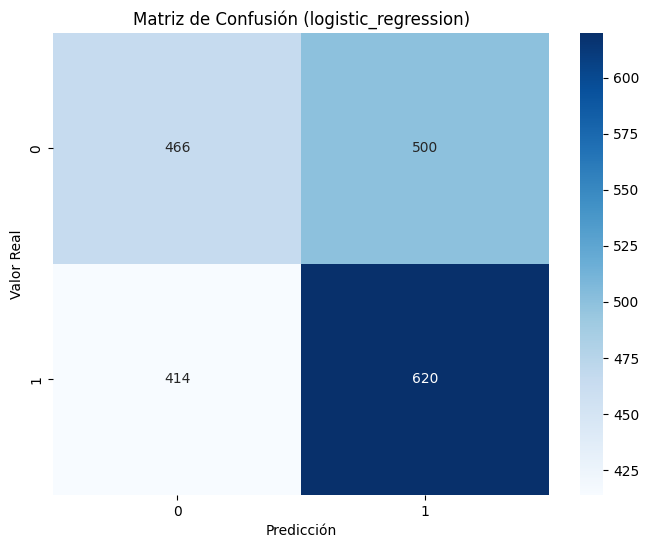

In [ ]:
soporte.plot_matriz_confusion("logistic_regression")

# Conclusiones
He eliminado las columnas = ["transaction_id", "customer_id", "merchant_id", "amount", "transaction_time", "transaction_description"] porque son columnas que no son importantes y se me olvido quitarlas en el preprocesamiento.

Tengo un modelo que tiene 0.07 en el kappa pero 0.54 en AUC. El kappa me da a entender que la prediccion es pesima y el auc me da a entender que predecimmos al azar.